# Mobility data analysis of researchers trajectories

*Author: Liubov*; *Collaborators: Marc, Bastian, Vero*

Notebook inspired from Open humans project https://www.openhumans.org

Read mobility files from Open humans
https://www.openhumans.org/api/public-data/?source=direct-sharing-138

Other notebooks 
https://exploratory.openhumans.org/notebooks/?source=Moves%20connection

Openhumans open API 
https://open-humans-api.readthedocs.io/en/latest/cli.html#example-use-cases


# Content 
1. Data preprocessing
2. Data analysis
3. Data visualisation
# 1. Data preprocessing

Json data analysis is described here:
https://www.dataquest.io/blog/python-json-tutorial/ 
We start with transforming json file to dataframe. Json file with google locations and we need to transform it to dataframe.

In [1]:
# main function analyzing moves_data    
# starting date of being researcher - get is from google form CSV file


#DATARANGE_START = "2016-06-01"
#DATARANGE_END = "2018-05-08"

import os
import json
import requests
from datetime import datetime
from collections import defaultdict
import pandas as pd
import numpy as np
import seaborn as sns


# sets the axis label sizes for seaborn
rc={'font.size': 14, 'axes.labelsize': 14, 'legend.fontsize': 14.0, 
    'axes.titlesize': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14}
sns.set(rc=rc)

#with open('C:/Users/lyubo/Documents/DATA_networks/mobilitydata/openhumans/moves-storyline-data.json') as f:
#    moves_data = json.load(f)

#with open('C:/Users/lyubo/Documents/DATA_networks/mobilitydata/openhumans/moves-storyline-data98972.json') as f:
#    moves_data3 = json.load(f)   
    

id_research1 = "05364098" # Bastian ID 05364098
#id_research1 = "32891125"#ID of researcher  # Marc ID 32891125 
print('data loaded for researcher ', str(id_research1))

with open('C:/Users/lyubo/Documents/DATA_networks/mobilitydata/openhumans/researcher_mobility/'+id_research1+'/direct-sharing-182/Location History.json') as f:
    moves_data_researcher1 = json.load(f)  
#with open('C:/Users/lyubo/Documents/DATA_networks/mobilitydata/openhumans/researcher_mobility/'+id_research1+'/direct-sharing-182/Location History.json') as f:
#    moves_data_researcher1 = json.load(f)   



df1 = pd.DataFrame(moves_data_researcher1)
df1.head(10)
#print(type(df1_datapoint ))
#print(df1.columns)


# function to get data from json data
#df1 = dataframe_from_json(moves_data) # works for other geo-files 
    
df1.locations.iloc[1]

data loaded for researcher  05364098


{'timestampMs': '1280557901000',
 'latitudeE7': 525368945,
 'longitudeE7': 81131936,
 'accuracy': 500}

Moves data for a researcher.

In [ ]:
"'locations': [{'timestampMs': '1546429982000',
   'latitudeE7': 119987508,
   'longitudeE7': 1202035421,
   'accuracy': 5,
   'velocity': 1,
   'heading': 240,
   'altitude': 11,
   'verticalAccuracy': 4},


# Creating  csv file from dataframe
We need to split column values into different values: timestamps, latitude, longitude etc.
This file we can then visualised in deck.gl or www.kepler.gl 



In [62]:

from math import sin, cos, sqrt, atan2

R = 6373.0
def dist_lat_lon(lat1,lon1,lat2,lon2):
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance


In [64]:

# create dataframe with lat, lon
time_array = [] # we create list of strings for time# np.zeros(int(df1.shape[0]))
lat_array = np.zeros(int(df1.shape[0])-1)
lon_array = np.zeros(int(df1.shape[0])-1)
lat_array_dest = np.zeros(int(df1.shape[0])-1)
lon_array_dest = np.zeros(int(df1.shape[0])-1)
dist_array= np.zeros(int(df1.shape[0])-1)
 
for ind in range(0,int(df1.shape[0])-1): # make a loop in all rows of dataframe df1 
    #df1_datapoint = df1.iloc[ind].values
    dict_df1_data = df1.iloc[ind].values[0]
    dict_df1_data_dest = df1.iloc[ind+1].values[0]    
    
    time = int(dict_df1_data['timestampMs'])*0.001
    ts = int(time)
    
    #print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
    time_array.append(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')) #datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')#dict_df1_data['timestampMs']
    #print(time_array[ind])#time_array.append(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')))
    lat_array[ind] = dict_df1_data['latitudeE7']*0.0000001
    lon_array[ind] = dict_df1_data['longitudeE7']*0.0000001
    lat_array_dest[ind] = dict_df1_data_dest['latitudeE7']*0.0000001
    lon_array_dest[ind] = dict_df1_data_dest['longitudeE7']*0.0000001

    dist_array[ind] = dist_lat_lon(lat_array[ind], lon_array[ind] , lat_array_dest[ind] , lon_array_dest[ind]) 
    #print(dist_array[ind])
    
#we add the last time stamp 
#time_array[ind] = time_array.append(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')) #datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')#dict_df1_data['timestampMs']

    

In [72]:

# Creating an empty Dataframe with column names only
df_new = pd.DataFrame(columns=[])#['User_ID', 'UserName', 'Action'])
 

# adding new columns to dataframe
df_new['time'] = time_array
df_new['start_lat'] = lat_array
df_new['start_lon'] = lon_array
#create row for coordinates of destinations
df_new['dest_lat'] = lat_array_dest
df_new['dest_lon'] = lon_array_dest
df_new['distance'] = dist_array

print('done with creating new dataframe')
    


done with creating new dataframe


 Let's see how the data looks like now.

In [73]:

df_new.head(10)

,time,start_lat,start_lon,dest_lat,dest_lon,distance
0,2010-07-31 06:31:04,52.325120,8.097732,52.536894,8.113194,1350.735616
1,2010-07-31 06:31:41,52.536894,8.113194,52.557340,8.113479,130.304575
2,2010-07-31 06:32:47,52.557340,8.113479,52.561325,8.112839,25.538086
3,2010-07-31 06:32:49,52.561325,8.112839,52.572300,8.110485,70.657676
4,2010-07-31 06:33:31,52.572300,8.110485,52.612850,8.125504,266.636920
5,2010-07-31 06:35:33,52.612850,8.125504,52.636900,8.150499,190.413820
6,2010-07-31 06:38:31,52.636900,8.150499,52.585690,8.117764,357.492508
7,2010-07-31 06:43:11,52.585690,8.117764,52.591050,8.217593,435.880050
8,2010-07-31 06:45:32,52.591050,8.217593,52.649680,8.158476,458.591714
9,2010-07-31 06:48:13,52.649680,8.158476,52.700951,8.173872,334.799889


In [53]:
# save file to csv file

df_new.to_csv('mobility_ID_'+str(id_research1)+'_researcher.csv')#id_researcher1

# 2. Data visualisation 

Here we visualise trajectory on the map.
We also upload the notebook to the OH website https://open-humans-api.readthedocs.io/en/latest/cli.html#upload-files-to-the-accounts-of-your-project-members 

In [22]:
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.cm as cm
import folium

# function to visualise trajectories on a map 

def visualise_df_traj(df):#, lat_values, lon_values):
    ''' function to visusalise trajectories on a map
    input:
    lat_values = df.latitude.values
    lon_values = df.longitude.values'''
    
    latitude = df.lat.values
    longitude = df.lon.values

    #then we zip two arrays of lat, lon of datapoints
    latlon1 = list(zip(latitude, longitude))


    #We put map to show first location of Paris 48.8566° North, 2.3522° est
    mapit = folium.Map( location=[48.75 , 2.35], zoom_start=6 )
    for coord in latlon1:
        folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=8 ).add_to( mapit )
    mapit


    #draw connecting line between locations written in latlon file

#    trips = df.tripid # different trips
#    array_trip = np.unique(trips) 
    SAF=folium.PolyLine(locations=latlon1,weight=5,color = 'r')#color_array[ind])
    mapit.add_child(SAF)
    #do not use plt.show with folium!
    


In [ ]:
#run function
lat_values = df_new.lat.values
lon_values = df_new.lon.values

visualise_df_traj(df_new)#, lat_values, lon_values)




In [ ]:
# use folium map without function 
# attention Folium map may be quite heave when you run it

latitude = df_new.lat.values
longitude = df_new.lon.values

#then we zip two arrays of lat, lon of datapoints
latlon1 = list(zip(latitude, longitude))


#we put map to show first location of Paris 48.8566° North, 2.3522° est
mapit = folium.Map( location=[48.75 , 2.35], zoom_start=6 )
for coord in latlon1:
    folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=8 ).add_to( mapit )
mapit


#draw connecting line between locations written in latlon file

SAF=folium.PolyLine(locations=latlon1,weight=5,color = 'r')#color_array[ind])
mapit.add_child(SAF)
#plt.show()







# 3. Data analysis

Here we do trajectories analysis of researchers and user profiling:

0. we analyze distributions of trip durations, trip lengths 
1. we analyze frequencies of cities and places visited
2. we calculate the number of amenities of places around the trajectories in places, where researchers stayed the longest
3. we analyze possible common properties of trajectories of researchers




In [54]:
#functions inserted from OH notebook 

import json
from pprint import pprint



'''
Functions:
 to estimate the distribution of stop duration
 to estimate the distribution of jump length
'''



def len_jumps_distribution(daily_segments):
    """
    takes a daily segment of Moves 
    returns the distribution of jumps lengths (calculated from lat/long of stops)
    can be misleading for days w/ lots of travel etc. 
    """
    places_of_traj = [] #returns array of all locations during the day
    for i in daily_segments: 
        if i['type'] == 'place':
            place_location = i['place']['location']
            places_of_traj.append([place_location])
    return places_of_traj


def longest_daily_location(daily_segments):
    """
    Function from Bastian (Open Humans)
       
    takes a daily segment log of Moves and returns the 
    lat/long for the location where most time was spent. 
    Can be misleading for days w/ lots of travel etc. 
    But the most quick/dirty solution for now.
    """
    places_of_day = []
    for i in daily_segments:
        if i['type'] == 'place':
            place_location = i['place']['location']
            start_time = datetime.strptime(i['startTime'],'%Y%m%dT%H%M%S%z')
            end_time = datetime.strptime(i['endTime'],'%Y%m%dT%H%M%S%z')
            duration = end_time - start_time
            places_of_day.append([place_location,duration])
    places_of_day.sort(key=lambda tup: tup[-1],reverse=True)
    return places_of_day[0][0]




# Data analysis preprocessing

We create additional column in dataframe for calculated distance between sequent data points.

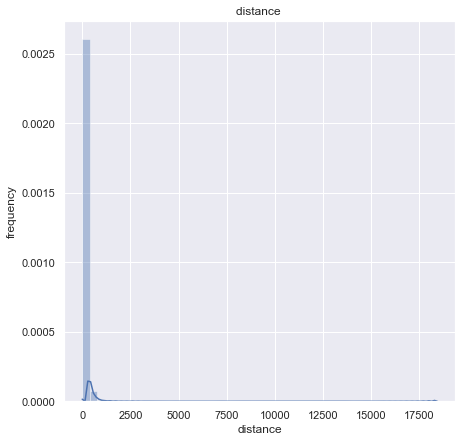

In [75]:
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt

sns.set()

f, ax = plt.subplots(figsize=(7, 7))
#ax.set( yscale="log")
ax = sns.distplot(df_new.distance.values)
plt.title('distance ')
plt.xlabel('distance')
plt.ylabel('frequency')
plt.show()


# Alternative interactive visualisation

We use kepler.gl for plotting the data. For this one would need kepler.gl installed or you can run generated file on kepler.gl website in the browser.

Alternative visualisations can be done using
1. https://mode.com/blog/python-interactive-plot-libraries
2. https://github.com/keplergl/kepler.gl

In [ ]:
import keplergl

# Load a map with data and config and height
from keplergl import KeplerGl
map_1 = KeplerGl(height=400, data={"data_1": my_df}, config=config)

# DataFrame is loaded

# CSV file loading
with open('df1_ID_'+str(id_research1)+'_researcher.csv', 'r') as f:
    csvData = f.read()
map_1.add_data(data=csvData, name='data_2')

map_1.add_data(data=geojson, name='geojson')